In [1]:
import torch
from diffusers import AutoencoderKL
model_id = "stabilityai/stable-diffusion-2-1"
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")
vae = vae.to('cuda')


In [2]:
#!curl --output macaw.jpg 'https://lafeber.com/pet-birds/wp-content/uploads/2018/06/Scarlet-Macaw-2.jpg'

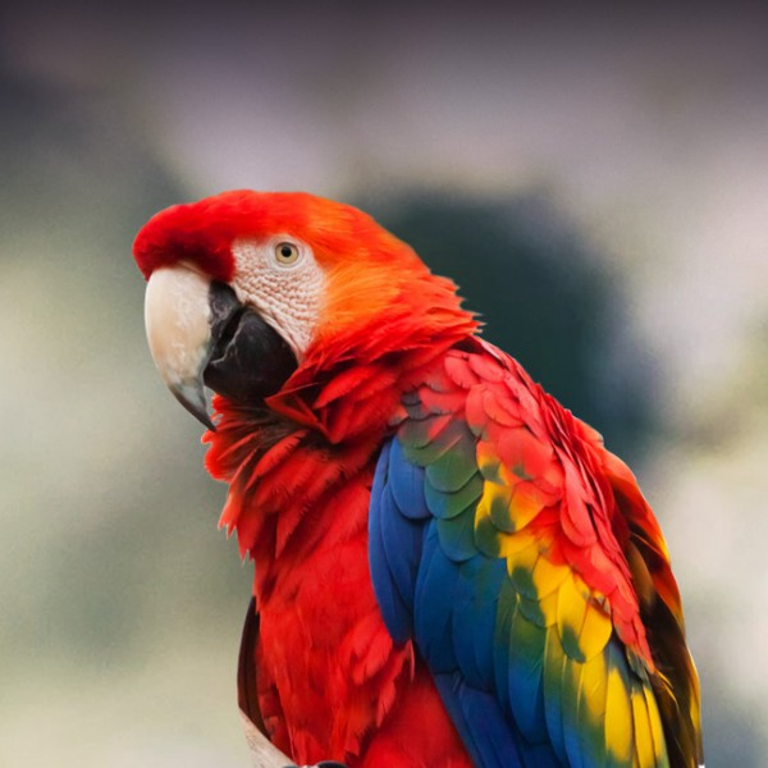

In [3]:
from PIL import Image
input_image = Image.open('macaw.jpg').resize((768, 768))
input_image

In [4]:
from torchvision import transforms as tfms
tfms.ToTensor()(input_image)

tensor([[[0.1804, 0.1804, 0.1804,  ..., 0.2392, 0.2392, 0.2431],
         [0.1843, 0.1843, 0.1843,  ..., 0.2392, 0.2392, 0.2431],
         [0.1843, 0.1882, 0.1882,  ..., 0.2392, 0.2392, 0.2392],
         ...,
         [0.8471, 0.8471, 0.8471,  ..., 0.5451, 0.5529, 0.5608],
         [0.8471, 0.8471, 0.8471,  ..., 0.5451, 0.5529, 0.5608],
         [0.8471, 0.8471, 0.8471,  ..., 0.5412, 0.5529, 0.5569]],

        [[0.1529, 0.1529, 0.1529,  ..., 0.2118, 0.2118, 0.2157],
         [0.1569, 0.1569, 0.1569,  ..., 0.2118, 0.2118, 0.2157],
         [0.1569, 0.1608, 0.1608,  ..., 0.2118, 0.2118, 0.2118],
         ...,
         [0.8196, 0.8196, 0.8196,  ..., 0.5608, 0.5686, 0.5765],
         [0.8196, 0.8196, 0.8196,  ..., 0.5608, 0.5686, 0.5765],
         [0.8196, 0.8196, 0.8196,  ..., 0.5608, 0.5686, 0.5725]],

        [[0.1843, 0.1843, 0.1843,  ..., 0.2431, 0.2431, 0.2471],
         [0.1882, 0.1882, 0.1882,  ..., 0.2431, 0.2431, 0.2471],
         [0.1882, 0.1922, 0.1922,  ..., 0.2431, 0.2431, 0.

In [5]:
torch_device='cuda'
def pil_to_latent(input_im):
    # Single image -> single latent in a batch (so size 1, 4, 64, 64)
    with torch.no_grad():
        latent = vae.encode(tfms.ToTensor()(input_im).unsqueeze(0).to(torch_device)*2-1) # Note scaling
    return 0.18215 * latent.latent_dist.sample()

def latents_to_pil(latents):
    # bath of latents -> list of images
    latents = (1 / 0.18215) * latents
    with torch.no_grad():
        image = vae.decode(latents).sample
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
    images = (image * 255).round().astype("uint8")
    pil_images = [Image.fromarray(image) for image in images]
    return pil_images

In [6]:
latent_sample = pil_to_latent(input_image)

In [7]:
latent_sample.shape

torch.Size([1, 4, 96, 96])

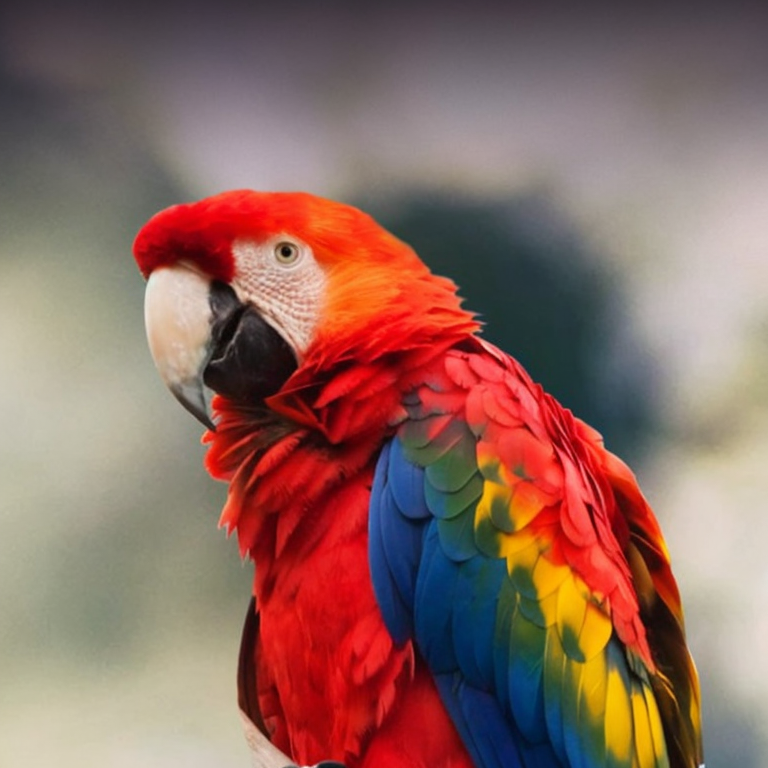

In [8]:
decoded = latents_to_pil(latent_sample)[0]
decoded